In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

data = pd.read_csv('./train.csv')

In [2]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into dev and training sets

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [3]:
Y_train

array([4, 5, 5, ..., 8, 1, 1], dtype=int64)

In [4]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A
    
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

In [5]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [6]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.15, 500)

Iteration:  0
[5 7 0 ... 7 7 1] [4 5 5 ... 8 1 1]
0.05951219512195122
Iteration:  10
[7 9 0 ... 9 1 1] [4 5 5 ... 8 1 1]
0.18158536585365853
Iteration:  20
[7 9 0 ... 2 1 1] [4 5 5 ... 8 1 1]
0.26358536585365855
Iteration:  30
[7 7 0 ... 2 1 1] [4 5 5 ... 8 1 1]
0.32426829268292684
Iteration:  40
[7 7 0 ... 8 1 1] [4 5 5 ... 8 1 1]
0.37409756097560976
Iteration:  50
[7 8 0 ... 8 1 1] [4 5 5 ... 8 1 1]
0.42721951219512194
Iteration:  60
[7 8 0 ... 8 1 1] [4 5 5 ... 8 1 1]
0.4785609756097561
Iteration:  70
[7 5 0 ... 8 1 1] [4 5 5 ... 8 1 1]
0.5114146341463415
Iteration:  80
[7 5 0 ... 8 1 1] [4 5 5 ... 8 1 1]
0.5388536585365854
Iteration:  90
[7 5 0 ... 8 1 1] [4 5 5 ... 8 1 1]
0.5739756097560975
Iteration:  100
[7 5 0 ... 8 1 1] [4 5 5 ... 8 1 1]
0.6143170731707317
Iteration:  110
[7 5 0 ... 8 1 1] [4 5 5 ... 8 1 1]
0.6461463414634147
Iteration:  120
[7 5 0 ... 8 1 1] [4 5 5 ... 8 1 1]
0.6683170731707317
Iteration:  130
[7 5 0 ... 8 1 1] [4 5 5 ... 8 1 1]
0.6859512195121952
Iteration: 

In [7]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions


In [8]:
def backward_propagation(X, y, weights, for_prop): 
    # from chain rule. we are measuring the influence of biases and weights to change of output layers softmax values
    m = X.shape[0]
    dZ3 = for_prop['A3'].T - y
    dW3 = (for_prop['A2'].T @ dZ3.T) / m
    db3 = np.sum(dZ3) / m
    dA2 = dZ3.T @ weights['W3'].T
    dZ2 = dA2 * (for_prop['A2'] > 0)
    dW2 = (for_prop['A1'].T @ dZ2) / m
    db2 = np.sum(dZ2) / m
    dA1 = dZ2 @ weights['W2'].T
    dZ1 = dA1 * (for_prop['A1'] > 0)
    dW1 = (X @ dZ1) / m
    db1 = np.sum(dZ1) / m
    return {'db1':db1, 'dW1':dW1, 'db2':db2, 'dW2':dW2, 'db3':db3, 'dW3':dW3}

In [9]:
def update_weights(learning_rate, gradients, weights):
    weights['W1'] -= (learning_rate*gradients['dW1'])
    weights['b1'] -= (learning_rate*gradients['db1'])
    weights['W2'] -= (learning_rate*gradients['dW2'])
    weights['b2'] -= (learning_rate*gradients['db2'])
    weights['W3'] -= (learning_rate*gradients['dW3'])
    weights['b3'] -= (learning_rate*gradients['db3'])
    return weights

In [10]:
def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [8]
Label:  8


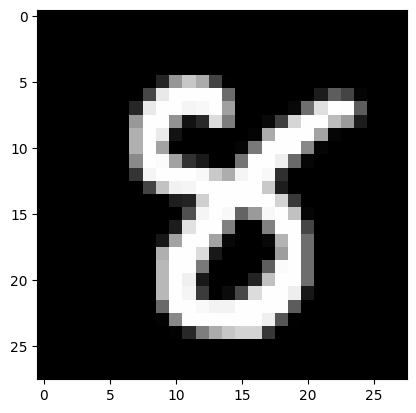

In [11]:
test_prediction(655, W1, b1, W2, b2)


In [12]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[9 7 1 9 1 1 4 5 0 1 1 7 3 8 4 0 7 8 1 7 1 1 4 3 6 9 8 9 2 2 0 3 3 3 8 6 0
 2 4 6 9 2 9 7 4 5 1 7 6 0 1 9 0 1 7 9 8 4 0 9 2 1 4 8 9 8 6 3 0 5 9 5 9 0
 0 2 7 2 1 6 1 0 5 9 3 2 1 2 6 0 3 4 3 2 6 3 0 4 8 0 5 9 3 8 6 5 7 5 8 1 4
 0 6 8 1 8 6 9 4 8 3 5 8 7 9 6 3 1 0 6 4 3 0 1 5 0 3 9 2 3 3 8 2 3 0 7 5 4
 6 5 6 3 2 7 3 7 6 4 7 8 3 3 0 7 1 2 8 3 7 6 9 8 1 5 9 6 1 5 5 4 0 0 2 3 2
 4 8 2 8 4 4 1 4 5 4 4 4 3 1 8 7 1 9 5 2 9 7 4 3 8 4 0 8 6 1 6 8 3 6 9 2 9
 0 6 3 3 0 0 8 2 6 6 8 2 9 3 2 1 3 9 8 9 9 1 5 1 0 2 9 3 7 9 7 0 1 4 1 1 2
 4 0 1 8 1 6 8 4 3 2 3 3 0 5 8 9 7 7 0 8 8 2 6 4 7 6 5 1 8 7 4 6 1 5 1 2 4
 4 4 1 9 9 0 2 2 4 0 9 4 2 5 1 8 6 1 6 7 8 3 2 4 8 9 0 8 2 2 1 4 5 8 6 9 7
 3 3 3 7 9 3 4 3 7 7 6 8 5 8 6 5 2 1 7 4 6 8 6 0 8 9 9 9 6 0 4 2 9 4 0 2 4
 8 4 6 6 0 2 2 0 1 6 3 6 7 8 5 3 5 9 5 6 6 7 3 9 5 1 1 2 9 4 9 3 4 2 0 6 2
 8 1 7 1 1 2 4 4 7 4 7 3 9 7 7 1 8 2 8 0 3 4 2 1 3 2 0 5 8 9 3 8 6 3 4 7 7
 2 8 2 6 4 6 2 4 7 1 0 5 3 8 6 5 9 5 9 8 8 7 1 5 6 1 7 9 6 1 0 4 1 6 5 6 6
 7 0 4 8 9 1 3 1 3 5 9 0 

0.861

Prediction:  [8]
Label:  7


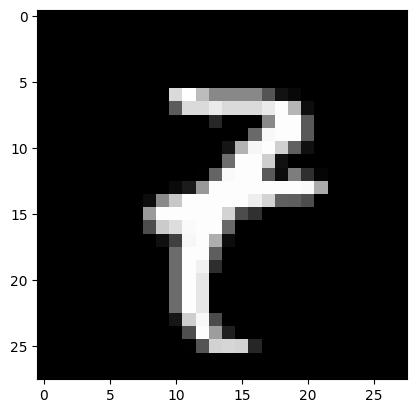

In [13]:
test_prediction(100, W1, b1, W2, b2)

Prediction:  [1]
Label:  1


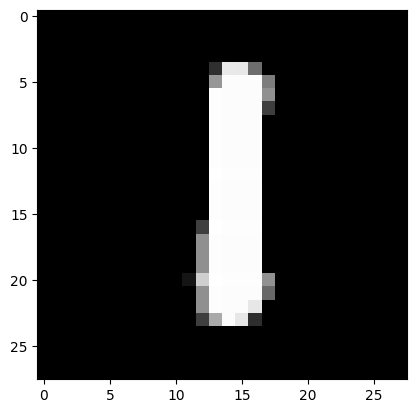

In [28]:
test_prediction(39999, W1, b1, W2, b2)